In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score

In [48]:
import pandas as pd
df = pd.read_json('/home/jovyan/Interpretation/vector_embeddings.json')

In [3]:
df.shape

(7084, 16)

In [49]:
category_counts = df["Encoded Categories"].value_counts()

# create a list of categories that have a frequency count greater than or equal to 2
valid_categories = category_counts[category_counts >= 2].index.tolist()#The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

# create a new DataFrame that only includes rows where the category is in the valid_categories list
new_data = df[df["Encoded Categories"].isin(valid_categories)]
new_data.shape

(6369, 16)

In [50]:
df=new_data

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def cluster(inp_vec):

    X = df[inp_vec].to_list()  # Features (PDF document vectors)
    y = df['Encoded Categories'].to_list()  # Target variable (categories)

    # Fix Shape as vectors are of different shapes
    max_len = max(len(x) for x in X)
    X = np.array([np.concatenate([x, [0] * (max_len - len(x))]) for x in X])

    features = X
    target = y

    X_train, X_test, y_train, y_test = train_test_split(features, target,stratify=target, test_size=0.3, random_state=42,shuffle=True)

    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
   
    return  y_train, y_test, y_pred

In [7]:
y_train_rnn, y_test_rnn, y_pred_rnn = cluster('RNN vectors')

In [8]:
y_train_lsa, y_test_lsa, y_pred_lsa = cluster('LSA vectors')

In [9]:
y_train_dv, y_test_dv, y_pred_dv = cluster('doc2vec vectors')

In [51]:
df['concatenated'] = df['RNN vectors'] + df['LSA vectors'] + df['doc2vec vectors']

In [52]:
y_train_con, y_test_con, y_pred_con = cluster('concatenated')

In [10]:
#f1 score

In [11]:
f1score_rnn = f1_score(y_test_rnn, y_pred_rnn, average='weighted')

In [12]:
f1score_lsa = f1_score( y_test_lsa, y_pred_lsa, average='weighted')

In [13]:
f1score_dv = f1_score(y_test_dv, y_pred_dv, average='weighted')

In [53]:
f1score_con = f1_score(y_test_con, y_pred_con, average='weighted')

In [14]:
f1score_rnn

0.06774282802803966

In [15]:
f1score_lsa

0.08140248634301536

In [16]:
f1score_dv

0.07315173884368065

In [66]:
f1score_con

0.06521605348729952

In [17]:
#accuracy

In [18]:
acc_rnn = accuracy_score(y_test_rnn, y_pred_rnn)

In [19]:
acc_lsa = accuracy_score(y_test_lsa, y_pred_lsa)

In [20]:
acc_dv = accuracy_score(y_test_dv, y_pred_dv)

In [54]:
acc_con = accuracy_score(y_test_con, y_pred_con)

In [21]:
acc_rnn

0.1857666143380429

In [22]:
acc_lsa

0.19204604918890633

In [23]:
acc_dv

0.18628990057561487

In [55]:
acc_con

0.1836734693877551

In [24]:
#confusion matrix

In [25]:
cm_rnn = confusion_matrix(y_test_rnn, y_pred_rnn)

In [26]:
cm_lsa = confusion_matrix(y_test_lsa, y_pred_lsa)

In [27]:
cm_dv = confusion_matrix(y_test_dv, y_pred_dv)

In [56]:
cm_con = confusion_matrix(y_test_con, y_pred_con)

In [28]:
cm_rnn

array([[346,   0,   0, ...,   0,   0,   0],
       [  3,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]])

In [29]:
cm_lsa

array([[345,   0,   0, ...,   0,   0,   0],
       [  3,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]])

In [30]:
cm_dv

array([[340,   0,   0, ...,   0,   0,   0],
       [  3,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [57]:
cm_con

array([[346,   0,   0, ...,   0,   0,   0],
       [  3,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0]])

In [31]:
#df_analyse

In [58]:
df_analyse = pd.DataFrame()
df_analyse['Algorithm']=['RNN','LSA','Doc2Vec','concatenated']
df_analyse['F1 Score']=[f1score_rnn,f1score_lsa,f1score_dv,f1score_con]
df_analyse['Accuracy Score']=[acc_rnn,acc_lsa,acc_dv,acc_con]
df_analyse

,Algorithm,F1 Score,Accuracy Score
0,RNN,0.067743,0.185767
1,LSA,0.081402,0.192046
2,Doc2Vec,0.073152,0.186290
3,concatenated,0.065216,0.183673


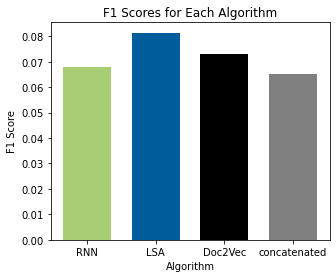

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Define colors for each bar
colors = ['#A8CD74' , '#005C9A', 'Black','grey']

# Create a bar chart showing the F1 score for each algorithm with different colors and thinner bars
fig, ax = plt.subplots(figsize=(5,4))
ax.bar(df_analyse['Algorithm'], df_analyse['F1 Score'], color=colors, width=0.7)
ax.set_xlabel('Algorithm')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Each Algorithm')
plt.show()

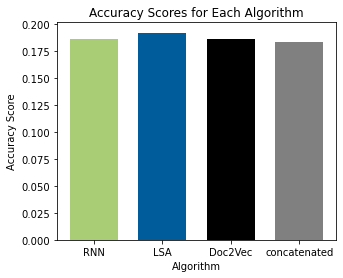

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

colors = ['#A8CD74' , '#005C9A', 'Black','grey']


# Create a bar chart showing the F1 score for each algorithm with different colors and thinner bars
fig, ax = plt.subplots(figsize=(5,4))
ax.bar(df_analyse['Algorithm'], df_analyse['Accuracy Score'], color=colors, width=0.7)
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy Score')
ax.set_title('Accuracy Scores for Each Algorithm')
plt.show()

In [35]:
#df_res

In [62]:
df_res = pd.DataFrame()

df_res['y_test']=y_test_rnn
df_res['y_pred_rnn']=y_pred_rnn
df_res['y_pred_lsa']=y_pred_lsa
df_res['y_pred_dv']=y_pred_dv
df_res['y_pred_con']=y_pred_con

In [37]:
df_res.shape

(1911, 6)

In [63]:
df_res.to_excel('ytest_ypreds_new.xlsx')

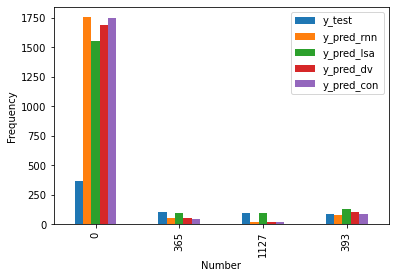

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the numbers of interest
numbers = [0, 365, 1127, 393]

# Create a dictionary to hold the counts for each number in each column
counts = {col: [df_res[col].eq(num).sum() for num in numbers] for col in df_res.columns}

# Create a dataframe from the counts dictionary
df_counts = pd.DataFrame(counts, index=numbers)

# Create a grouped bar chart from the counts dataframe
ax = df_counts.plot(kind='bar')
ax.set_xlabel('Number')
ax.set_ylabel('Frequency')
plt.show()


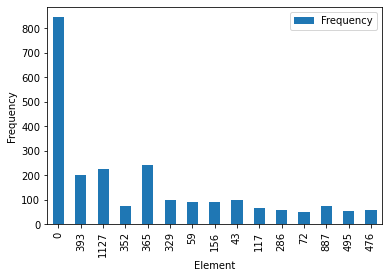

In [80]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample list with multiple elements
my_list = y_train_rnn

# Count the frequency of each element in the list
counted_list = Counter(my_list)

# Convert the Counter object into a Pandas DataFrame
dff = pd.DataFrame.from_dict(counted_list, orient='index', columns=['Frequency'])

# Filter the DataFrame to include only values with frequency greater than 2
dff = dff[dff['Frequency'] > 50]

# Plot the frequency counts as a bar chart
dff.plot(kind='bar')
plt.xlabel('Element')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#misclassified results

In [77]:
misclassified_idx = np.where(y_pred_lsa != y_test_lsa)[0]
misclassified_categories = y_pred_lsa[misclassified_idx]

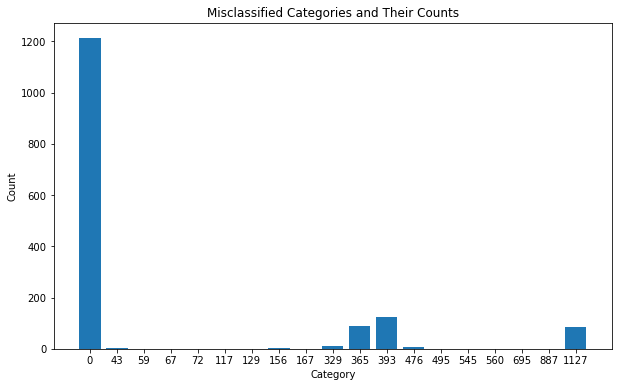

In [79]:
unique_values, counts = np.unique(misclassified_categories, return_counts=True)

# Define the misclassified categories and their counts
categories = unique_values
counts =  counts

# Set plot size
plt.figure(figsize=(10, 6))

# Create a bar plot
plt.bar([str(cat) for cat in categories], counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Misclassified Categories and Their Counts')

plt.show()

In [ ]:
#precision recall curve
#plotting only classes that are significant in number

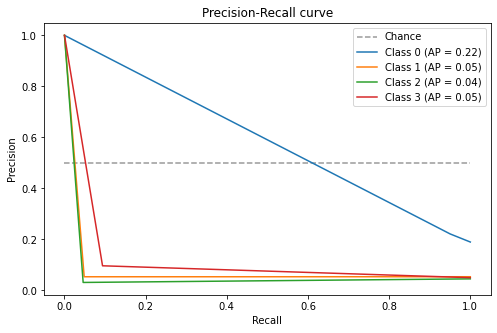

In [97]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_curve, average_precision_score


class_counts = np.sum(y_test_lsa, axis=0)
valid_classes = np.where(class_counts > 50)[0]
y_test_lsa = y_test_lsa[:, valid_classes]
y_pred_lsa = y_pred_lsa[:, valid_classes]

lb = LabelBinarizer()
lb.fit(y_test_lsa)

y_test_lsa = lb.transform(y_test_lsa)
y_pred_lsa = lb.transform(y_pred_lsa)

class_counts = np.sum(y_test_lsa, axis=0)
valid_classes = np.where(class_counts > 50)[0]
y_test_lsa = y_test_lsa[:, valid_classes]
y_pred_lsa = y_pred_lsa[:, valid_classes]

precision = dict()
recall = dict()
average_precision = dict()

n_classes = y_test_lsa.shape[1]
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_lsa[:, i], y_pred_lsa[:, i])
    average_precision[i] = average_precision_score(y_test_lsa[:, i], y_pred_lsa[:, i])

plt.figure(figsize=(8, 5))
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='gray', label='Chance', alpha=.8)
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {valid_classes[i]} (AP = {average_precision[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()


In [98]:
valid_classes

array([0, 1, 2, 3])

In [99]:
class_counts

array([363, 103,  87,  96])

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

In [91]:
#Classification report
classification_report(y_test_rnn, y_pred_rnn,zero_division=1)

'              precision    recall  f1-score   support\n\n           0       0.20      0.95      0.33       363\n           1       1.00      0.00      0.00         3\n           2       1.00      0.00      0.00         1\n           3       1.00      0.00      0.00         4\n           5       1.00      0.00      0.00         4\n          10       1.00      0.00      0.00         4\n          11       1.00      0.00      0.00         1\n          13       1.00      0.00      0.00         2\n          14       1.00      0.00      0.00         1\n          19       1.00      0.00      0.00         1\n          25       1.00      0.00      0.00         1\n          26       1.00      0.00      0.00         6\n          29       1.00      0.00      0.00         1\n          31       1.00      0.00      0.00         1\n          32       1.00      0.00      0.00         1\n          35       1.00      0.00      0.00         6\n          43       1.00      0.00      0.00        42\n       

In [94]:
classification_report(y_test_lsa, y_pred_lsa,zero_division=1)

'              precision    recall  f1-score   support\n\n           0       0.22      0.95      0.36       363\n           1       1.00      0.00      0.00         3\n           2       1.00      0.00      0.00         1\n           3       1.00      0.00      0.00         4\n           4       1.00      0.00      0.00         4\n           5       1.00      0.00      0.00         4\n           6       1.00      0.00      0.00         1\n           7       1.00      0.00      0.00         2\n           8       1.00      0.00      0.00         1\n           9       1.00      0.00      0.00         1\n          10       1.00      0.00      0.00         1\n          11       1.00      0.00      0.00         6\n          12       1.00      0.00      0.00         1\n          13       1.00      0.00      0.00         1\n          14       1.00      0.00      0.00         1\n          15       1.00      0.00      0.00         6\n          16       0.17      0.02      0.04        42\n       

In [93]:
classification_report(y_test_dv, y_pred_dv,zero_division=1)

'              precision    recall  f1-score   support\n\n           0       0.20      0.94      0.33       363\n           1       1.00      0.00      0.00         3\n           2       1.00      0.00      0.00         1\n           3       1.00      0.00      0.00         4\n           5       1.00      0.00      0.00         4\n          10       1.00      0.00      0.00         4\n          11       1.00      0.00      0.00         1\n          13       1.00      0.00      0.00         2\n          14       1.00      0.00      0.00         1\n          19       1.00      0.00      0.00         1\n          25       1.00      0.00      0.00         1\n          26       1.00      0.00      0.00         6\n          29       1.00      0.00      0.00         1\n          31       1.00      0.00      0.00         1\n          32       1.00      0.00      0.00         1\n          35       1.00      0.00      0.00         6\n          43       0.00      0.00      0.00        42\n       

In [92]:
classification_report(y_test_con, y_pred_con,zero_division=1)

'              precision    recall  f1-score   support\n\n           0       0.20      0.95      0.33       363\n           1       1.00      0.00      0.00         3\n           2       1.00      0.00      0.00         1\n           3       1.00      0.00      0.00         4\n           5       1.00      0.00      0.00         4\n          10       1.00      0.00      0.00         4\n          11       1.00      0.00      0.00         1\n          13       1.00      0.00      0.00         2\n          14       1.00      0.00      0.00         1\n          19       1.00      0.00      0.00         1\n          25       1.00      0.00      0.00         1\n          26       1.00      0.00      0.00         6\n          29       1.00      0.00      0.00         1\n          31       1.00      0.00      0.00         1\n          32       1.00      0.00      0.00         1\n          35       1.00      0.00      0.00         6\n          43       1.00      0.00      0.00        42\n       